In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [4]:
null_indices = np.where(df['Temperature'].isnull())
print(null_indices)

(array([122]),)


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.drop([122,123],inplace=True)

In [7]:
inx = np.where(df['Classes'].isnull())
inx

(array([165]),)

In [8]:
df[160:170]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
162,09,07,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9,3.1,fire
163,10,07,2012,34,51,16,3.8,77.5,8,9.5,2,7.7,1.3,not fire
164,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
170,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire
171,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire


In [9]:
df['Classes'].fillna(df['Classes'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
df['Classes'] = df['Classes'].str.strip()
df['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 244, dtype: object

In [12]:
df['Classes'] = df['Classes'].map({'not fire':0,'fire':1})

In [13]:
df['region'] = np.where(df.index <= 121, 0, 1)

In [42]:
df=df.drop(['day','month','year'],axis=1)

KeyError: "['day', 'month', 'year'] not found in axis"

In [16]:
df.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

In [21]:
df= pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [19]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


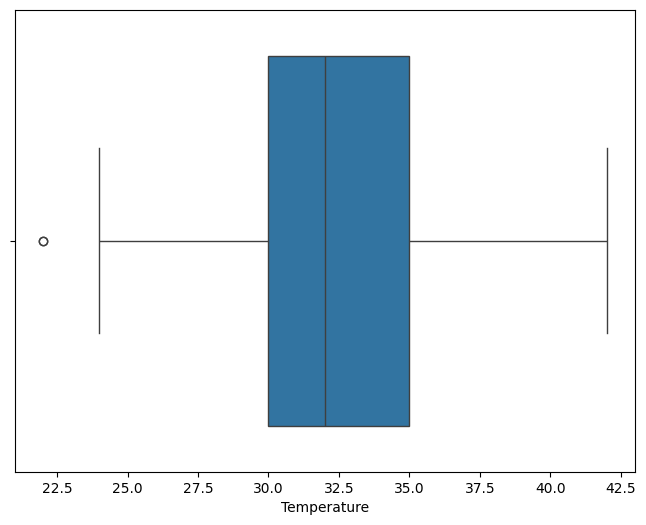

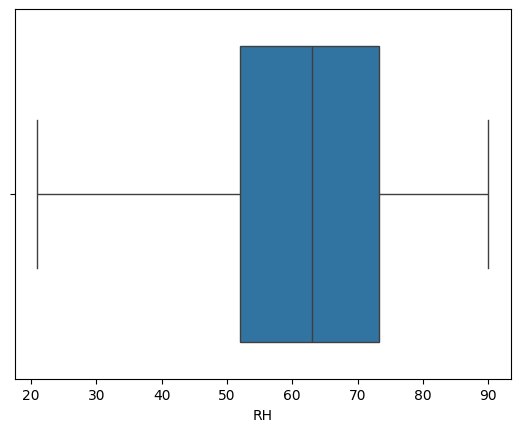

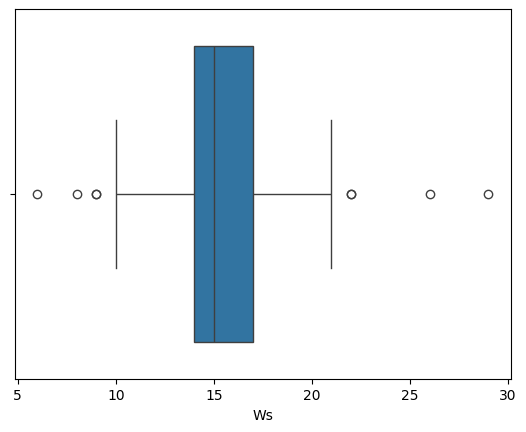

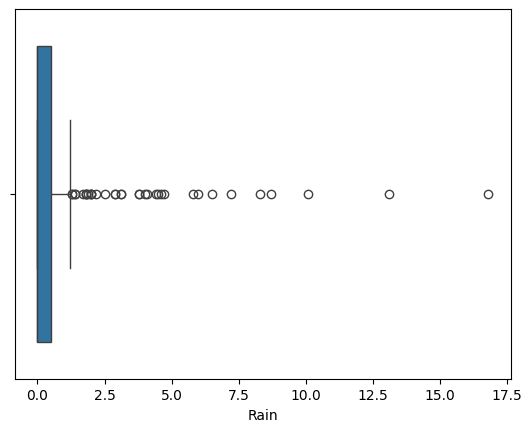

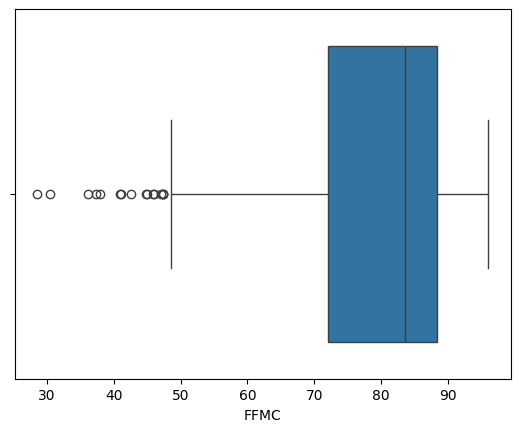

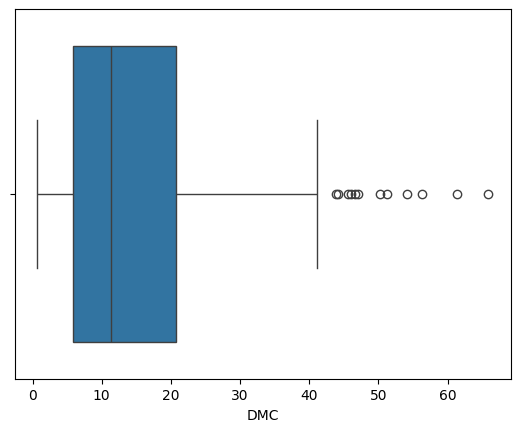

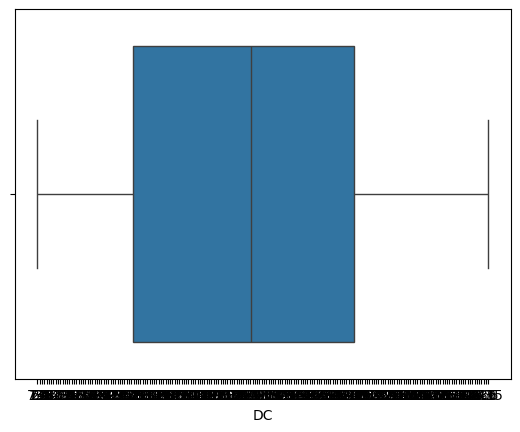

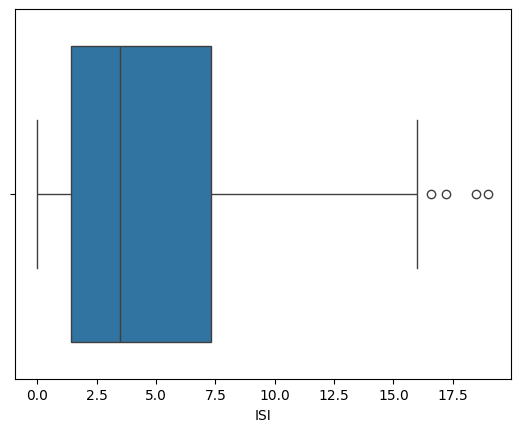

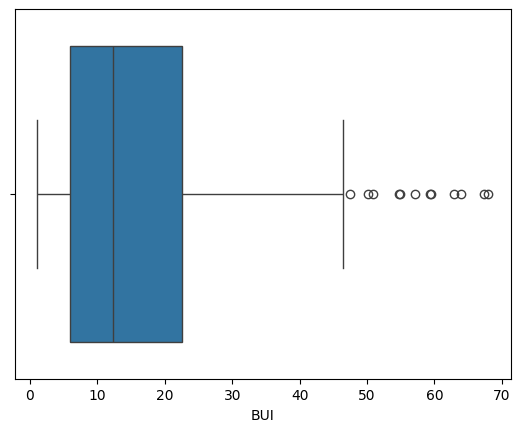

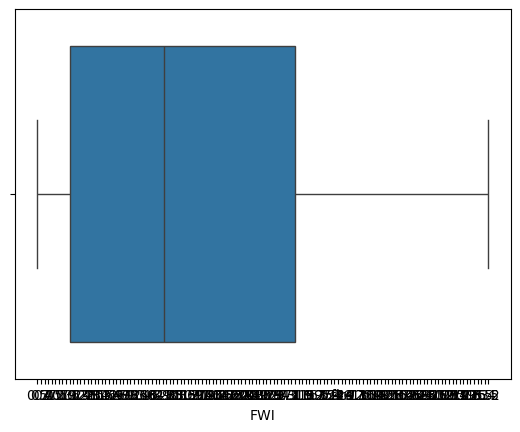

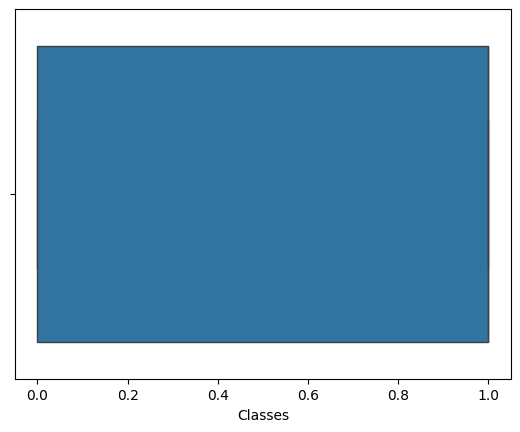

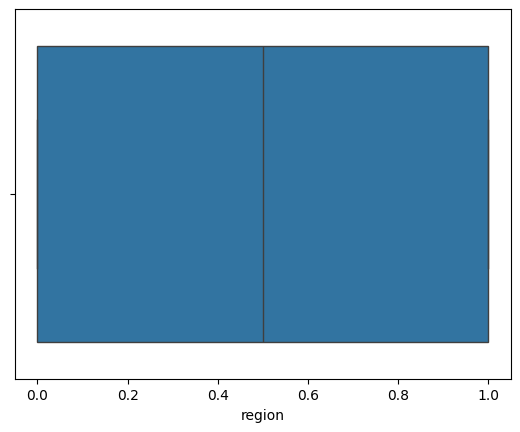

In [20]:
plt.figure(figsize=(8,6))
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.show()

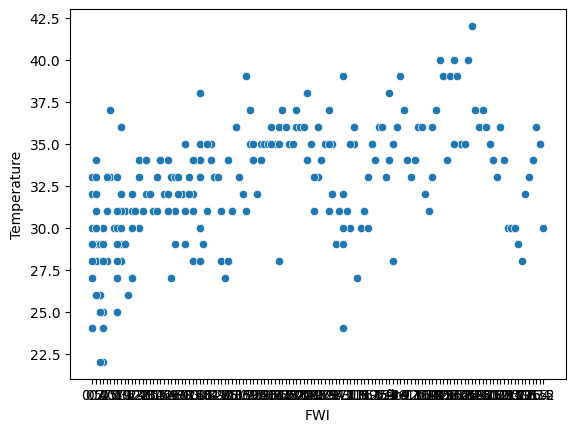

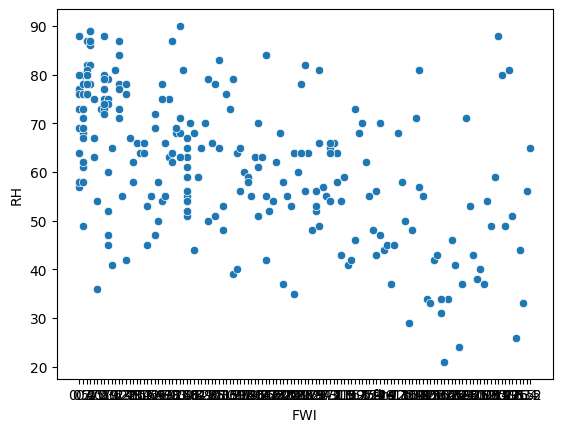

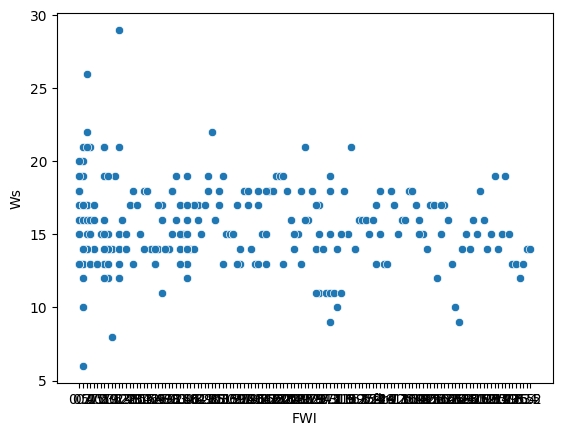

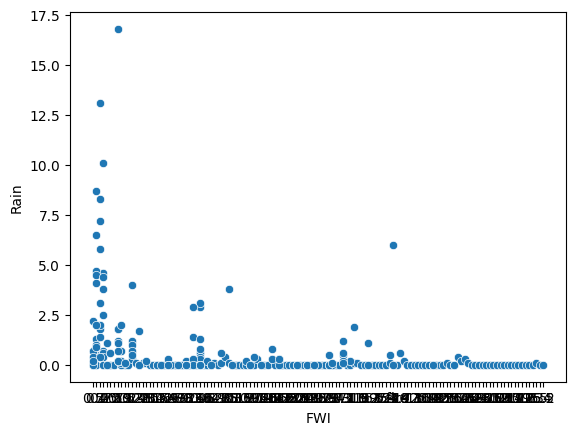

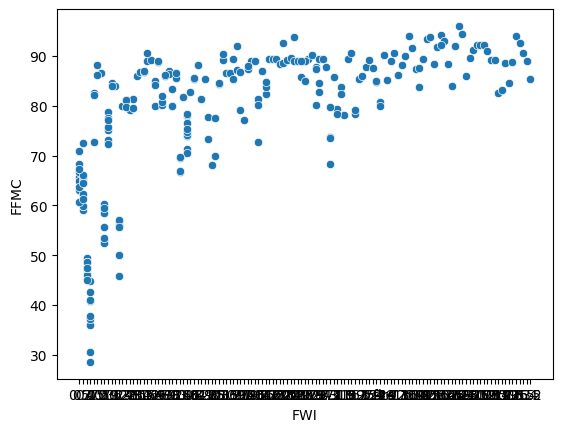

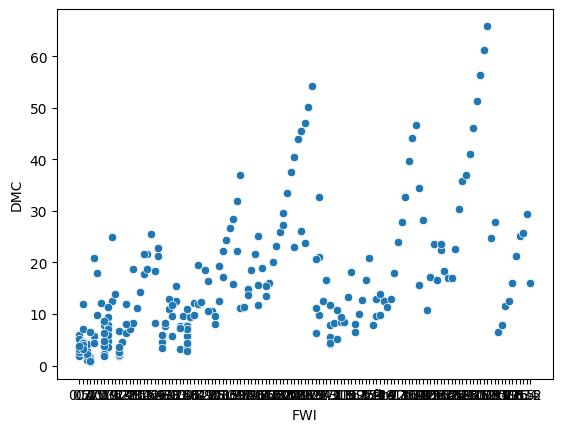

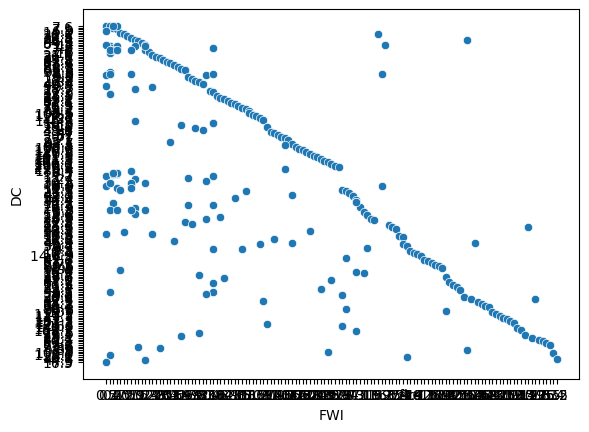

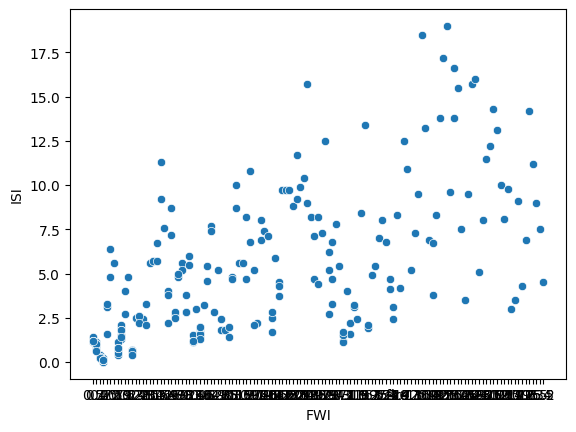

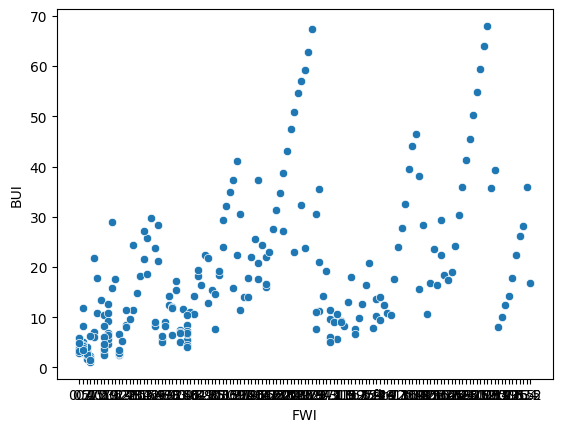

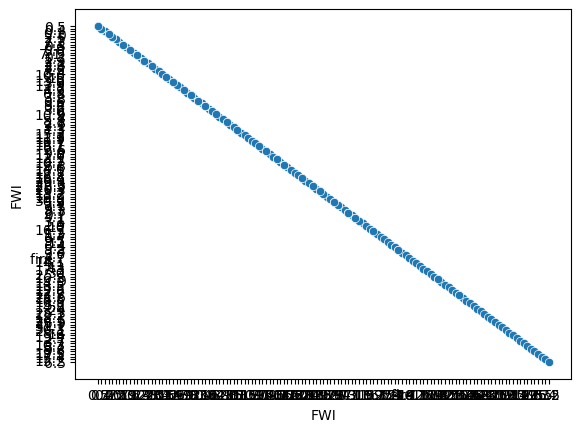

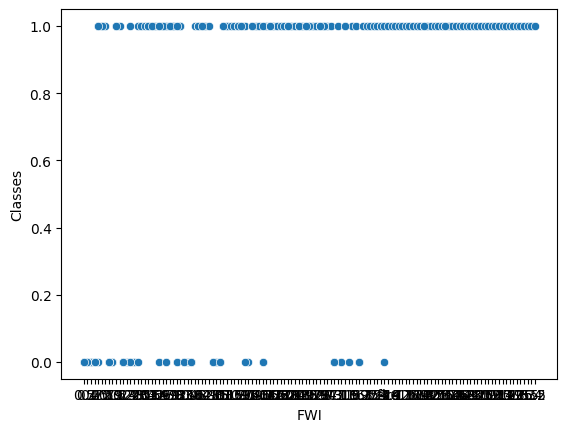

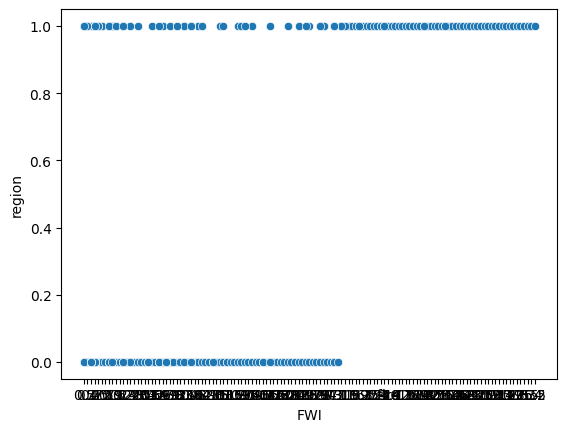

In [23]:
for column in df.columns:
    sns.scatterplot(y=df[column],x=df['FWI'])
    plt.show()

In [ ]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

    return df_cleaned

In [28]:
for column in df.columns:
    print(f"data for the {column}")
    print(df[column].value_counts())

data for the Temperature
Temperature
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: count, dtype: int64
data for the RH
RH
64    10
55    10
58     8
54     8
78     8
      ..
21     1
90     1
24     1
38     1
26     1
Name: count, Length: 62, dtype: int64
data for the Ws
Ws
14    43
15    40
13    30
17    28
16    27
18    26
19    15
21     8
11     7
12     7
10     3
9      2
20     2
22     2
26     1
8      1
6      1
29     1
Name: count, dtype: int64
data for the Rain
Rain
0.0     133
0.1      18
0.2      12
0.3      10
0.4       8
0.7       6
0.6       6
0.5       5
1.1       3
1.2       3
2.0       3
1.8       3
0.8       2
2.9       2
1.3       2
3.8       2
1.4       2
1.0       2
3.1       2
16.8      1
4.5       1
6.5       1
4.1       1
13.1      1
1.9       1
6.0       1
2.2       1
1.7       1
2.5       1
4.7       1
8.7       1
7.2     

In [36]:
# Attempt to convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric")

# Calculate the correlation matrix
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864,0.584188,0.191094
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.857973,0.583882,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [37]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        0
region         0
dtype: int64

In [38]:
df.fillna(df.mean(),inplace=True)

In [39]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [40]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.374909,0.607551,0.455504,0.564599,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.225621,-0.690637,-0.348587,-0.577577,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079005,0.015248,0.029756,0.032315,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.297975,-0.347105,-0.299171,-0.324369,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.506778,0.739730,0.589652,0.690289,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875887,0.674499,0.982073,0.875827,0.584188,0.191094
DC,0.374909,-0.225621,0.079005,-0.297975,0.506778,0.875887,1.000000,0.505032,0.941610,0.739521,0.510315,-0.078572
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.505032,1.000000,0.635891,0.916343,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941610,0.635891,1.000000,0.857628,0.583882,0.087370
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.739521,0.916343,0.857628,1.000000,0.718079,0.196696


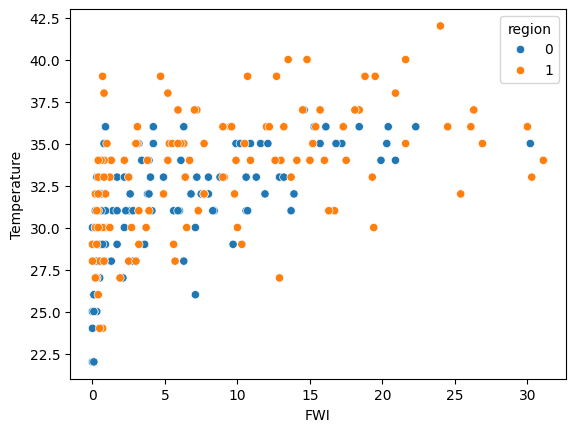

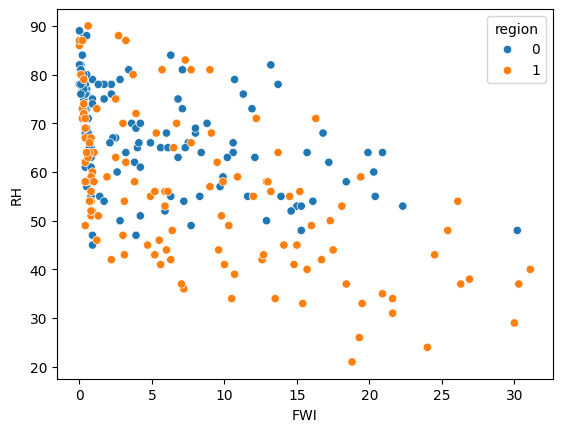

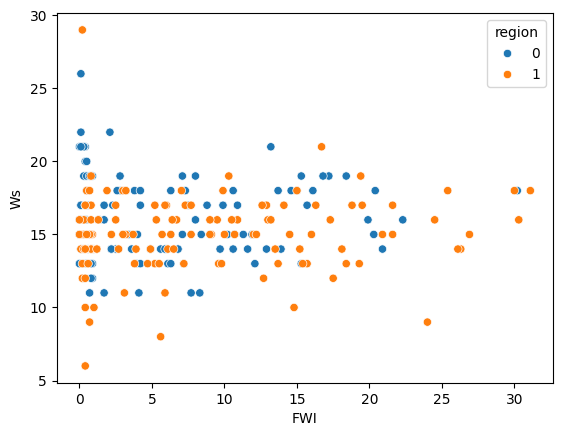

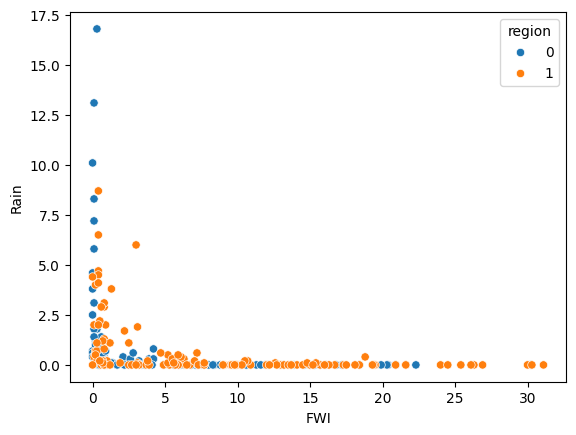

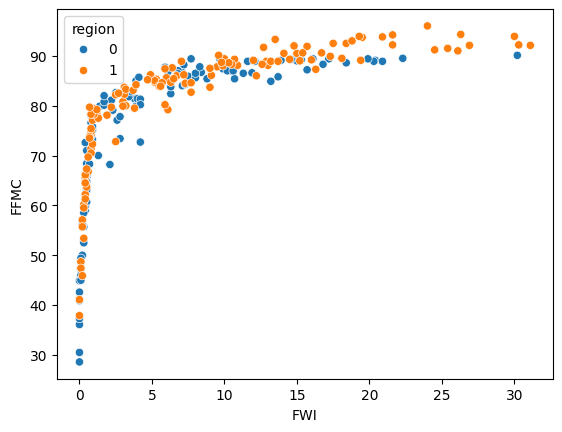

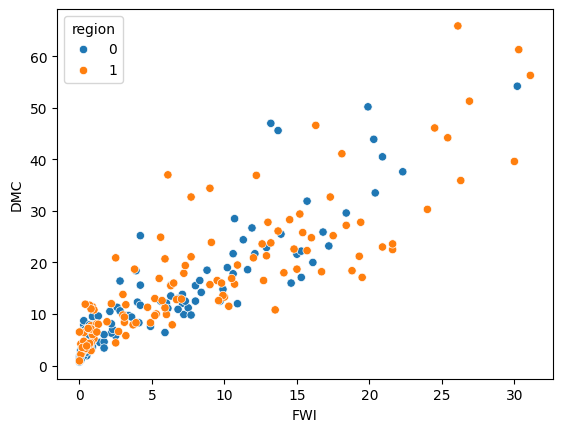

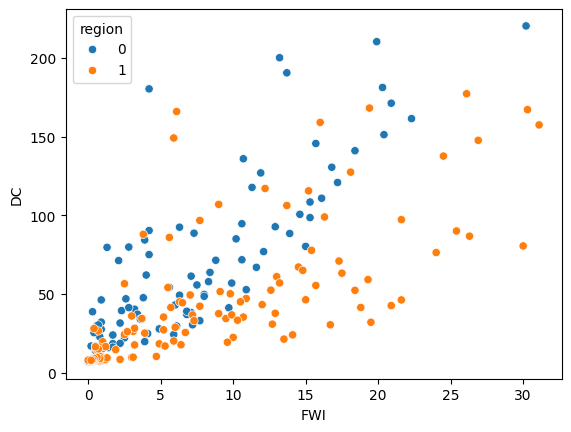

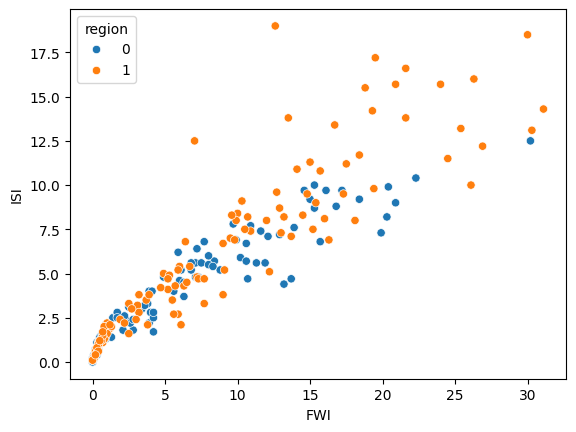

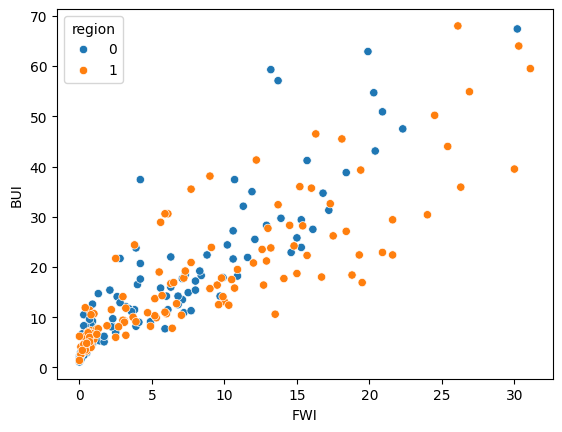

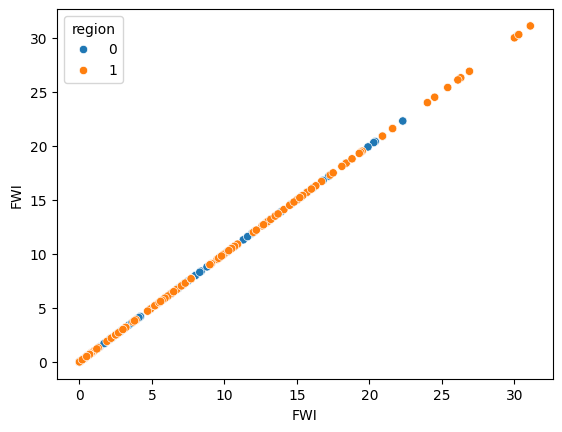

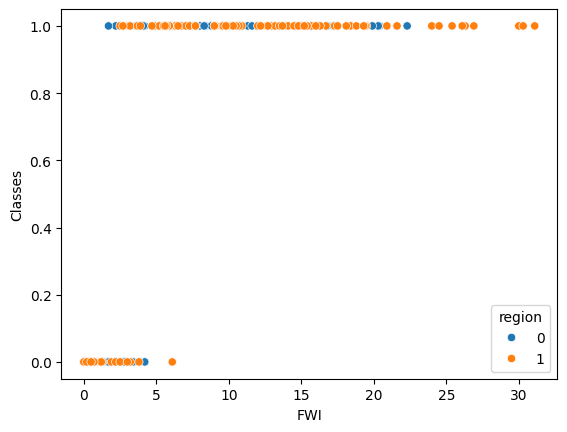

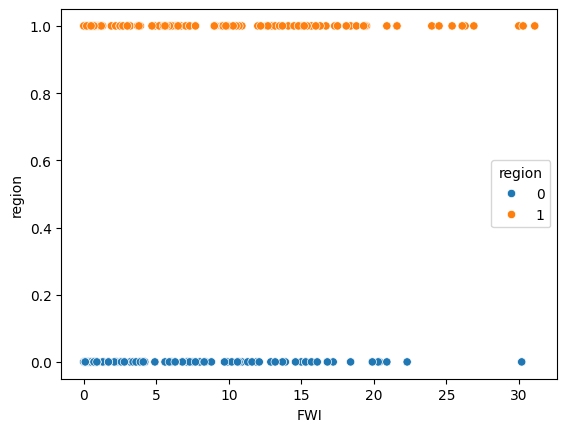

In [41]:
for column in df.columns:
    sns.scatterplot(y=df[column],x=df['FWI'],hue = df['region'])
    plt.show()

In [59]:
df_copy = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1).dropna()
df_time = df_copy.iloc[:,:3]
df_time

,day,month,year
0,01,06,2012
1,02,06,2012
2,03,06,2012
3,04,06,2012
4,05,06,2012
...,...,...,...
241,26,09,2012
242,27,09,2012
243,28,09,2012
244,29,09,2012


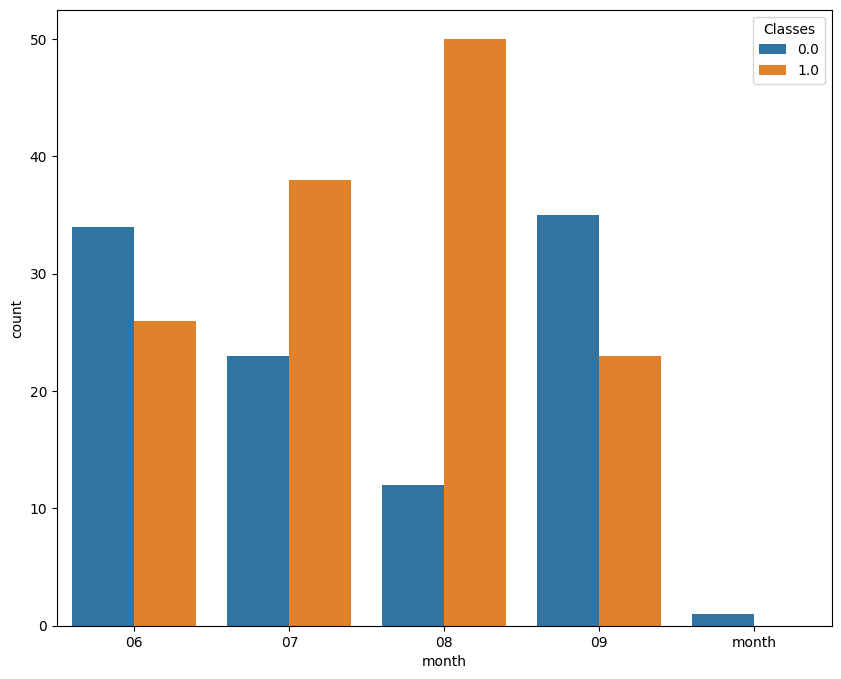

In [73]:
    plt.figure(figsize=(10,8))
    sns.countplot(hue=df['Classes'],x=df_copy['month'])
    plt.show()

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [76]:
x = df.drop(['Classes','FWI'],axis=1)
y = df['FWI']

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: >

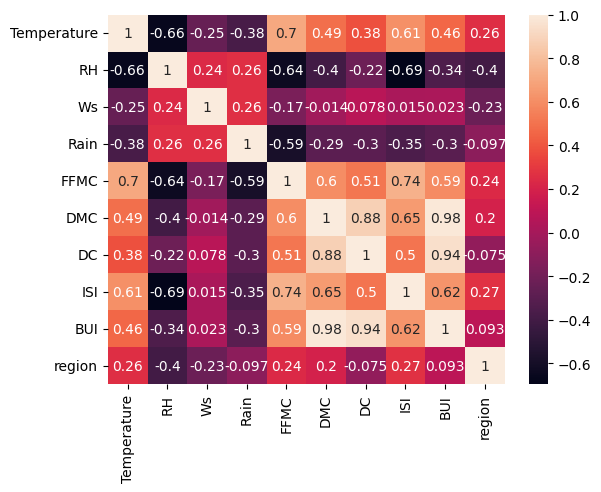

In [95]:
sns.heatmap(x_train.corr(),annot=True)

In [96]:
corr=x_train.corr()

In [97]:
colnames = set()
for i in range(len(corr)):
    for j  in range(i):
        if abs(corr.iloc[i,j])>0.8:
            colname = corr.columns[i]
            colnames.add(colname)

print(colnames)

{'BUI', 'DC'}


In [99]:
x_train.drop(colnames,axis=1,inplace=True)
x_test.drop(colnames,axis=1,inplace=True)
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,region
115,29,65,19,0.6,68.3,5.5,1.5,0
181,36,56,16,0.0,88.9,23.8,8.2,1
225,31,72,14,0.0,84.2,8.3,3.8,1
68,32,60,18,0.3,77.1,11.3,2.2,0
104,25,86,21,4.6,40.9,1.3,0.1,0
...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0
14,28,80,17,3.1,49.4,3.0,0.4,0
92,25,76,17,7.2,46.0,1.3,0.2,0
179,33,57,16,0.0,87.5,15.7,6.7,1


In [101]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

<Axes: >

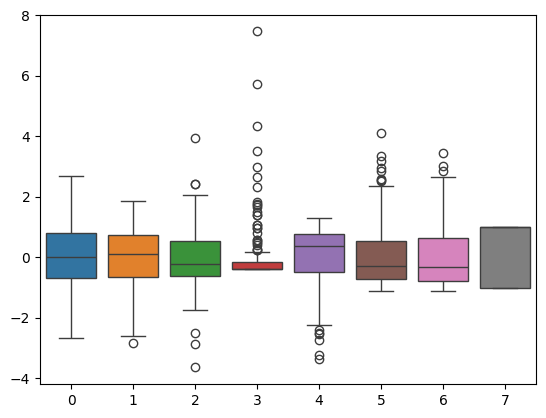

In [108]:
sns.boxplot(data=x_train_scaled)

<Axes: >

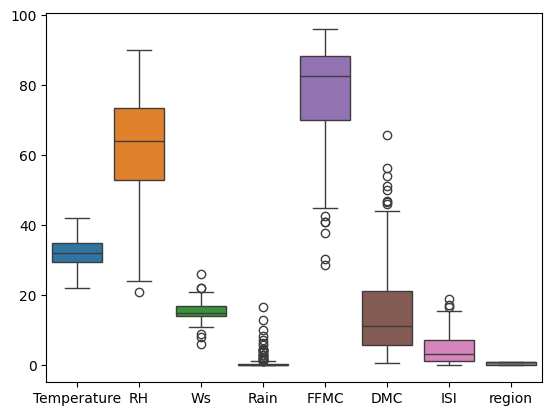

In [109]:
sns.boxplot(data=x_train)

In [111]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Linear Regression
Mean Squared Error: 0.6565516096534882
Mean Absolute Error: 0.634853386457851
R-squared: 0.9886656580804395
Adjusted R-squared: 0.9869219131697379


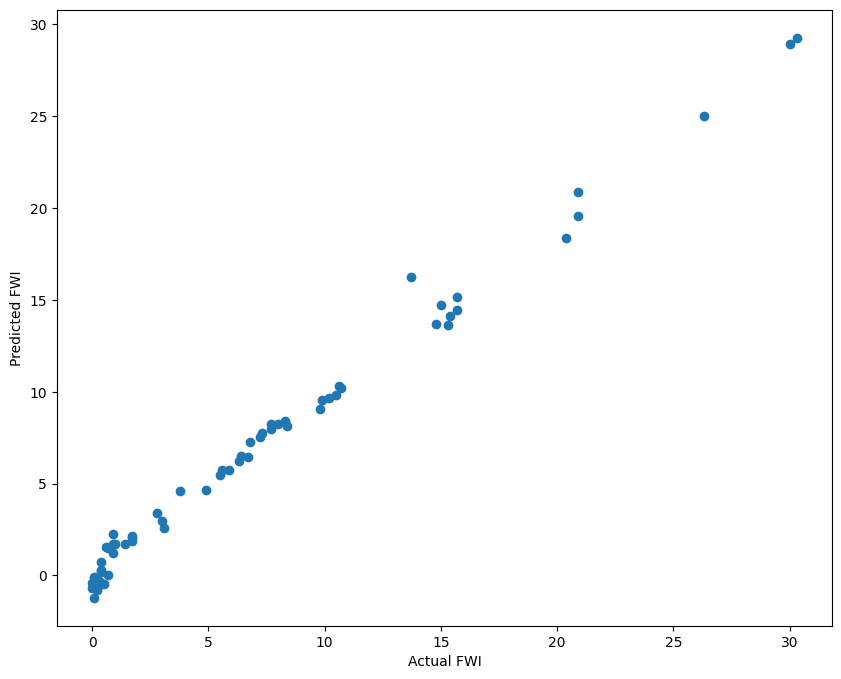

In [131]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.show()

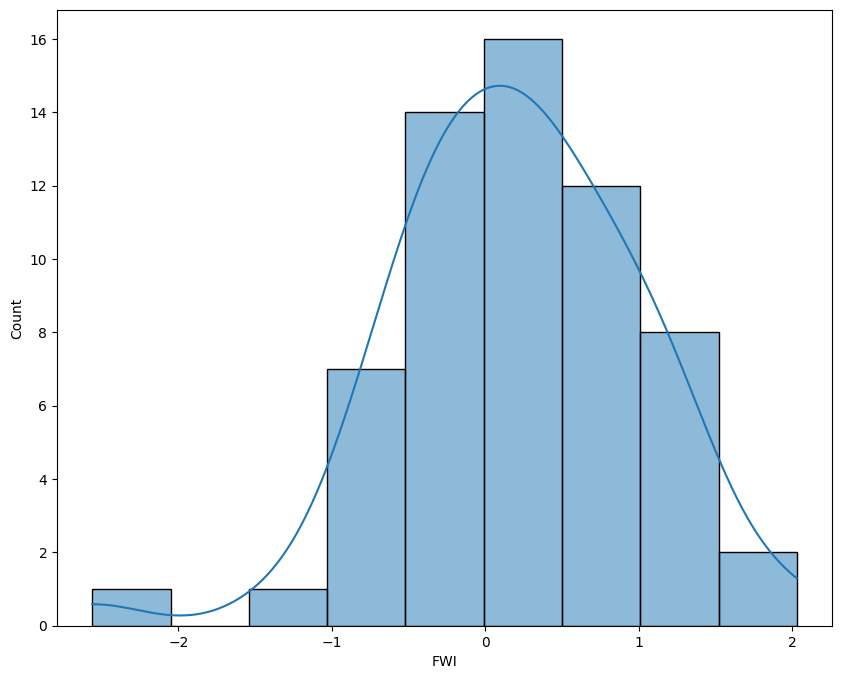

In [128]:
residuals = y_test - y_pred
plt.figure(figsize=(10,8))
sns.histplot(residuals,kde=True)
plt.show()

Ridge Regression
Mean Squared Error: 0.6870858459882327
Mean Absolute Error: 0.6520422578323178
R-squared: 0.9881385320026383
Adjusted R-squared: 0.986313690772275


<Axes: xlabel='FWI'>

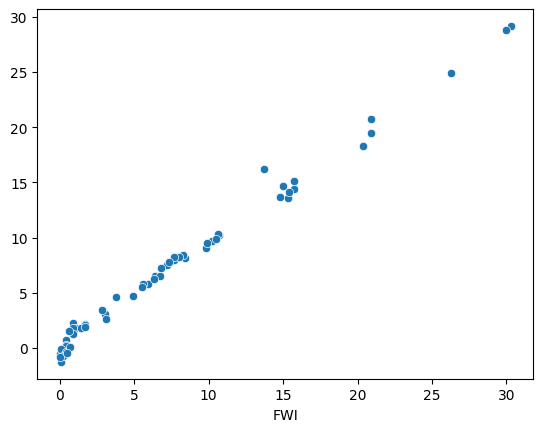

In [142]:
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("Ridge Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

Lasso Regression
Mean Squared Error: 2.903355234567022
Mean Absolute Error: 1.222772061468996
R-squared: 0.9498780896144685
Adjusted R-squared: 0.9421670264782329


<Axes: xlabel='FWI'>

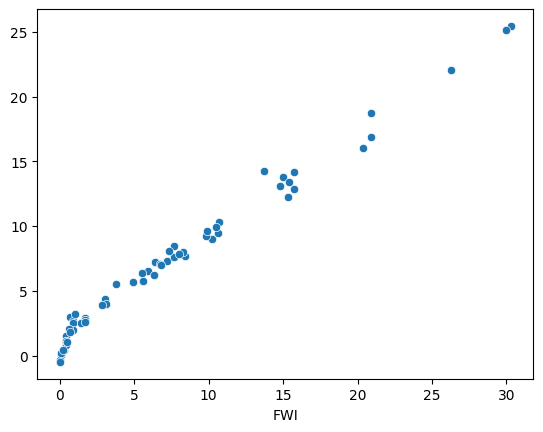

In [143]:
ridge = Lasso()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("Lasso Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

RidgeCV Regression
Mean Squared Error: 0.6870858459882327
Mean Absolute Error: 0.6520422578323178
R-squared: 0.9881385320026383
Adjusted R-squared: 0.986313690772275


<Axes: xlabel='FWI'>

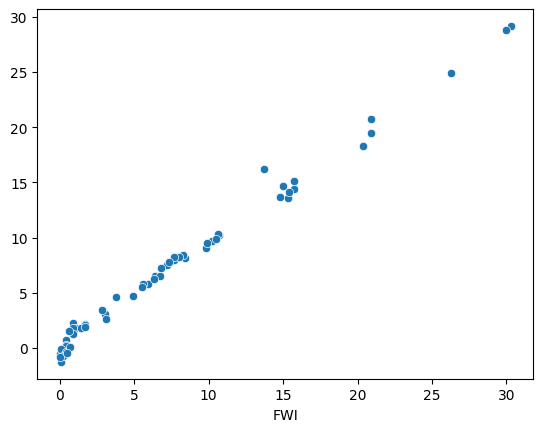

In [144]:
ridge = RidgeCV(cv=5)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("RidgeCV Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

LassoCV Regression
Mean Squared Error: 0.6946458273034208
Mean Absolute Error: 0.6561519887227752
R-squared: 0.9880080206888712
Adjusted R-squared: 0.9861631007948514


<Axes: xlabel='FWI'>

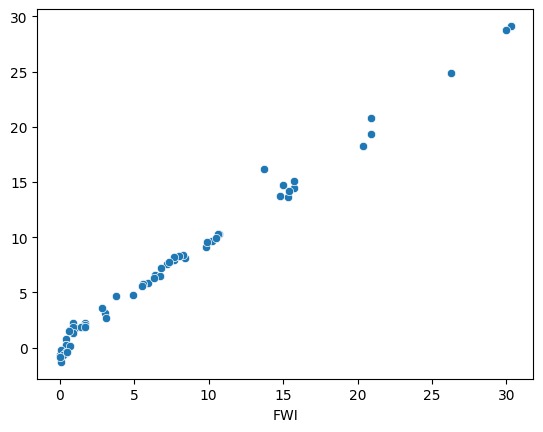

In [145]:
ridge = LassoCV(cv=5)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("LassoCV Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

ElasticNet Regression
Mean Squared Error: 7.2560839374241795
Mean Absolute Error: 1.9676999626062595
R-squared: 0.8747350015831921
Adjusted R-squared: 0.8554634633652216


<Axes: xlabel='FWI'>

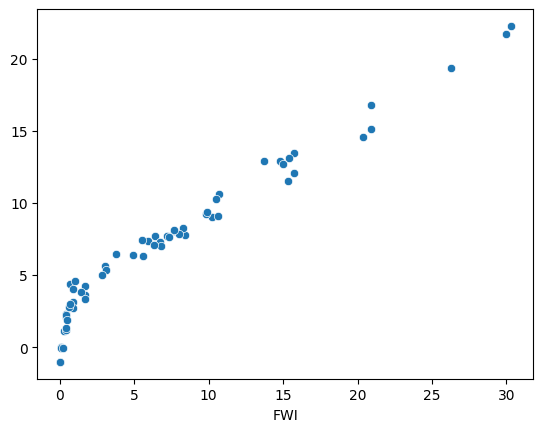

In [146]:
ridge = ElasticNet()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("ElasticNet Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

ElasticNetCV Regression
Mean Squared Error: 0.7054201173513082
Mean Absolute Error: 0.6621572967020541
R-squared: 0.9878220193364295
Adjusted R-squared: 0.9859484838497264


<Axes: xlabel='FWI'>

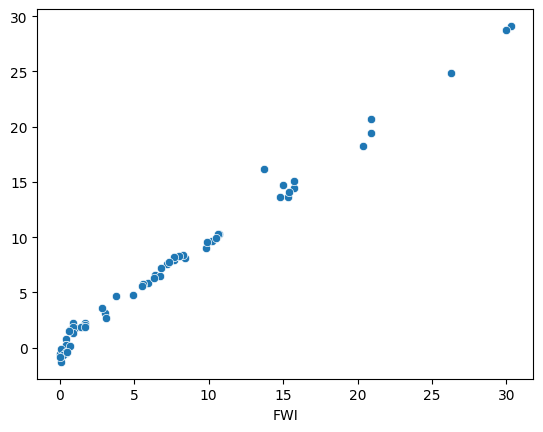

In [148]:
ridge = ElasticNetCV()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("ElasticNetCV Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

RidgeCV Regression
Mean Squared Error: 0.6870858459882327
Mean Absolute Error: 0.6520422578323178
R-squared: 0.9881385320026383
Adjusted R-squared: 0.986313690772275


<Axes: xlabel='FWI'>

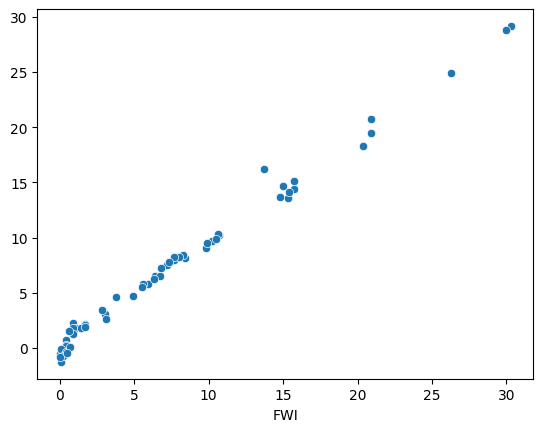

In [149]:
ridge = RidgeCV(cv=5)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
print("RidgeCV Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
sns.scatterplot(x=y_test,y=y_pred)

In [151]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))